In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [16]:
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2024-12-31'

# Fetch data directly using yfinance
df = yf.download('AAPL', start=start, end=end, progress=False)
print(df.head())


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454504  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-09,225.229996,229.750000,224.830002,229.539993,229.539993,33591100
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500
2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64707600


In [19]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [20]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [22]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


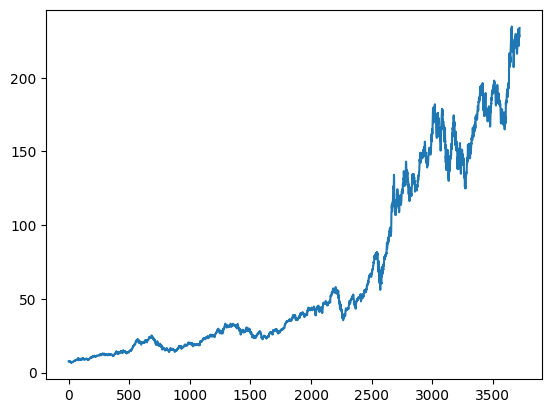

In [23]:
plt.plot(df.Close)

In [24]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3716,225.229996,229.750000,224.830002,229.539993,33591100
3717,227.779999,229.500000,227.169998,229.039993,28183500
3718,229.300003,229.410004,227.339996,227.550003,31759200
3719,228.699997,231.729996,228.600006,231.300003,39882100


In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3716    216.9867
3717    217.3784
3718    217.7435
3719    218.1330
3720    218.5625
Name: Close, Length: 3721, dtype: float64

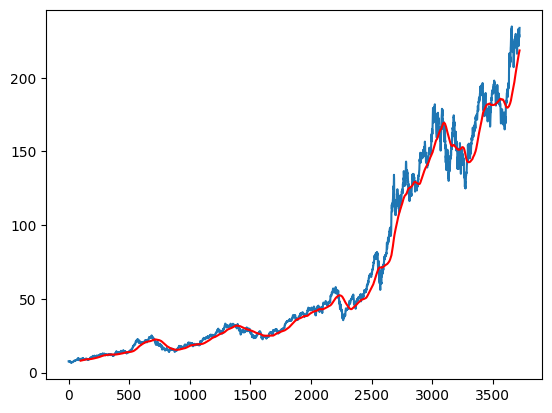

In [26]:
plt.figure(figure = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [27]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3716    198.40490
3717    198.58210
3718    198.75460
3719    198.94535
3720    199.14670
Name: Close, Length: 3721, dtype: float64

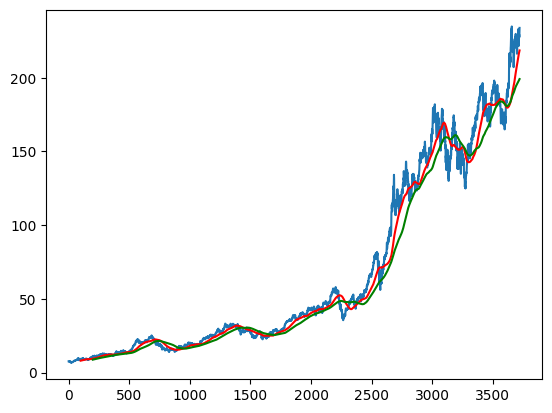

In [28]:
plt.figure(figure = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [29]:
df.shape

(3721, 5)

In [30]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) # --> This computes  70% of the total number of rows in df.
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) #--> This slice takes the remaining 30% of the data, starting from thr index at 70% of the DataFrame length up to the end of the dataframe.

# Purpose: The code splits the 'Close' prices of a stock from the DataFrame df into 2 parts: data_training for model training(70% of the data) and data_testing for model testing(30% of the data)
# Training and Testing: This approach is common in machine learning, where a model is trained on a subset of data and tested on another to evaluate its performance.

print(data_training.shape)
print(data_testing.shape)

(2604, 1)
(1117, 1)


In [31]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [32]:
data_testing.head()

,Close
2604,77.532501
2605,78.752502
2606,77.852501
2607,76.912498
2608,77.385002


In [33]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
data_training_array = scaler.fit_transform(data_training)
data_training_array



array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.90112226],
       [0.91136367],
       [0.92173844]])

In [35]:
data_training_array.shape

(2604, 1)

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [37]:
x_train.shape

(2504, 100, 1)

In [38]:
from tensorflow.keras.models import Sequential #A Sequential model is a linear stack of layers, where you can add one layer at a time in a sequential manner. It is the simplest way to build a neural netwi=ork.
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# LSTM(Long Short-Term Memory): It's a type of Recurrent Neural Network(RNN) layer that is good at learning from sequences, like time series data. It's used to learn patterns from historical stock price data to predict future values.
# Droput: This is a regularization technique used to prevent overfitting during training. It randomly drops a fraction of the neurons during each training step, making the model more robust by forcing it not to rely too much on specific neurons.
# Dense: This is a fully connceted layer, which means every neuron in the layer is connected to every neuron in the previous layer. It's often used as the output layer in a network to generate the final prediction.
# Input: This is used to specify the shape of the input data when you start defining your model. It helps set up the architecture correctly from the beginning.

In [39]:
model = Sequential() #This created a new instance of a sequential model, which means you will be adding layers one after the other.
model.add(Input(shape=(x_train.shape[1], 1))) #It's 1 because we are only using the stock price.

# Add LSTM and Dropout layers
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

#Adds an LSTM layer with 50 units (neurons).
#The return_sequences=True parameter ensures that the output of this LSTM layer will be a sequence, which is needed if you want to stack multiple LSTM layers.
#activation='relu' is used for non-linearity.
#Randomly drops 20% of the neurons during training to help prevent overfitting.

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

#return_sequences is set to False (default), meaning this layer will return a single output rather than a sequence, which is often needed before the final Dense layer

model.add(Dense(units=1))


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

''' optimizer='adam':
1. This model uses the Adam optimizer, which is an adaptive learning rate optimization algorithm that's popular for training deep learning models.
2. It combines the bemifits of two other optimizer: AdaGrad(which works well with sparse data) and RMSProp(which works wll with noisy data)'''

''' loss='mean_squared_error:
1. The loss function chosen here is Mean Squared Error(MSE), which is commonly used for regression tasks.
2. It measures the average squared difference between the predicted values and the actual values, so the model tries to minimize this during training.
'''
model.fit(x_train, y_train, epochs=50)

''' 1. The model will learn to map inputs in x_train to outputs in y_train.
2. The model will go through the entire training data 50 times.
An epoch is one complete forward and backward pass of all the training data. More epochs can lead to better learning,
but it also increases the risk of overfitting if the model memorizes the data rather than learning to generalize.
'''

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - loss: 0.0457
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 327ms/step - loss: 0.0056
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 381ms/step - loss: 0.0040
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - loss: 0.0041
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 354ms/step - loss: 0.0041
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 445ms/step - loss: 0.0038
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 374ms/step - loss: 0.0035
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 408ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 431ms/step - loss: 0.0028
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/step - loss: 0.0030
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 481ms/step - loss: 0.0030
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 547ms/step - loss: 0.0026
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 506ms/step - loss: 0.0023
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 497ms/step - loss: 0.0023
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 

In [42]:
model.save('my_model.keras')

In [43]:
data_testing.head()

,Close
2604,77.532501
2605,78.752502
2606,77.852501
2607,76.912498
2608,77.385002


In [44]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

,Close
0,68.787498
1,69.964996
2,70.102501
3,69.934998
4,70.004997


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07102991],
       [0.07761814],
       [0.0783875 ],
       ...,
       [0.95932353],
       [0.98030519],
       [0.99457274]])

In [48]:
input_data.shape


(1217, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1117, 100, 1)
(1117,)


Making Predictions

In [51]:
y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [52]:
y_predicted.shape

(1117, 1)

In [53]:
y_test

array([0.11995916, 0.1267852 , 0.1217496 , ..., 0.95932353, 0.98030519,
       0.99457274])

In [54]:
y_predicted

array([[0.14105807],
       [0.14262052],
       [0.14436364],
       ...,
       [0.9191694 ],
       [0.91835904],
       [0.9181267 ]], dtype=float32)

In [55]:
scaler.scale_


array([0.00559511])

In [56]:
scale_factor = 1/0.00559511
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

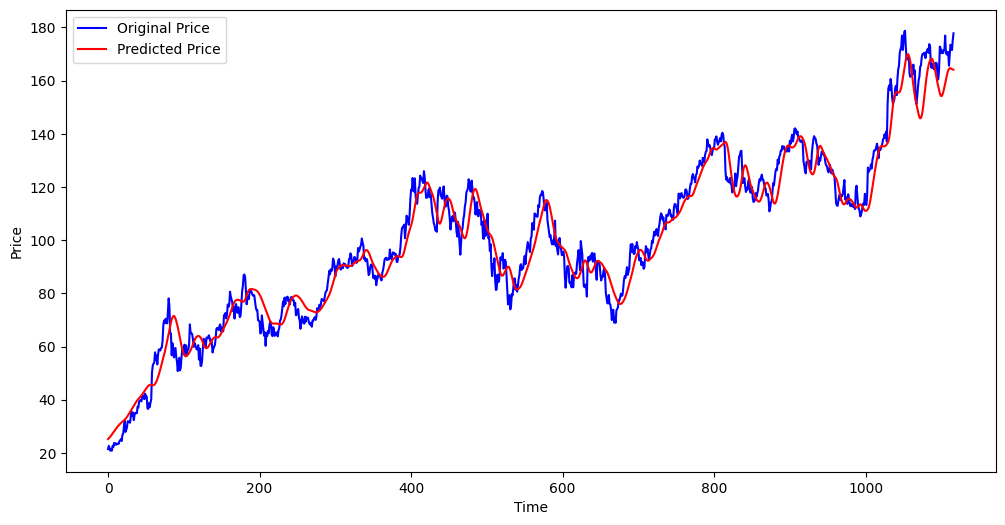

In [58]:
plt.figure(figsize=(12, 6))  # Use a tuple to define the figure size
plt.plot(y_test, 'b', label='Original Price')  # Original prices in blue
plt.plot(y_predicted, 'r', label='Predicted Price')  # Predicted prices in red
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()  
plt.show()